### Importing
Telebot : is a bot framework for Telegram Bot API. 
- This package provides the best of its kind API for command routing, inline query requests and keyboards, as well as callbacks.


Transformers : provides APIs and tools to easily download and train state-of-the-art pretrained models.

In [2]:
import telebot
from transformers import pipeline

DistilBERT(Question Answering)
- Pretrained Question Answering model, adapted from Hugging Face and curated to provide scalability and production-readiness using Spark NLP. distilbert-base-cased-distilled-squad is a English model originally trained by Hugging Face.

So we want to use his chekpoints to build our Question Answering Bot



In [3]:
model_checkpoint = "distilbert-base-cased-distilled-squad"
question_answer = pipeline("question-answering", model=model_checkpoint)

We already created a chatbot on Telegram to get the API from BotFather .... Like that! 

<img src="fatherbot.png">

In [4]:
API_TOKEN= "API_TOKEN"
bot = telebot.TeleBot(API_TOKEN)
dialog_check = 0
context_q = ""
question = ""

Here we built these function to use the DistilBERT model 

- Reference : https://github.com/eternnoir/pyTelegramBotAPI 

In [5]:
@bot.message_handler(commands=['start', 'help'])

def send_welcome(message):
    
    bot.reply_to(message, "Mr.Said, how are you doing?")
    
    

@bot.message_handler(content_types=['photo', 'sticker'])
def send_content_message(message):
    
    bot.reply_to(message, "That's not a text message!")
    
    
@bot.message_handler(func=lambda message: True)
def answer_the_question(message):
    global dialog_check
    global context_q
    global question
    
    if dialog_check == 0:
        bot.reply_to(message,"Please give context for our conversation")
        dialog_check = 1
        return
        
    if dialog_check == 1:
        bot.reply_to(message,"ok , ask me a question regarding the context")
        context_q = message.text
        dialog_check = 2
        return
    
    if dialog_check == 2:
        model_answer = question_answer(question=message.text, context=context_q )
        bot.reply_to(message,model_answer["answer"])
        dialog_check = 0
        return  
    
bot.polling()

### And this is a final results!

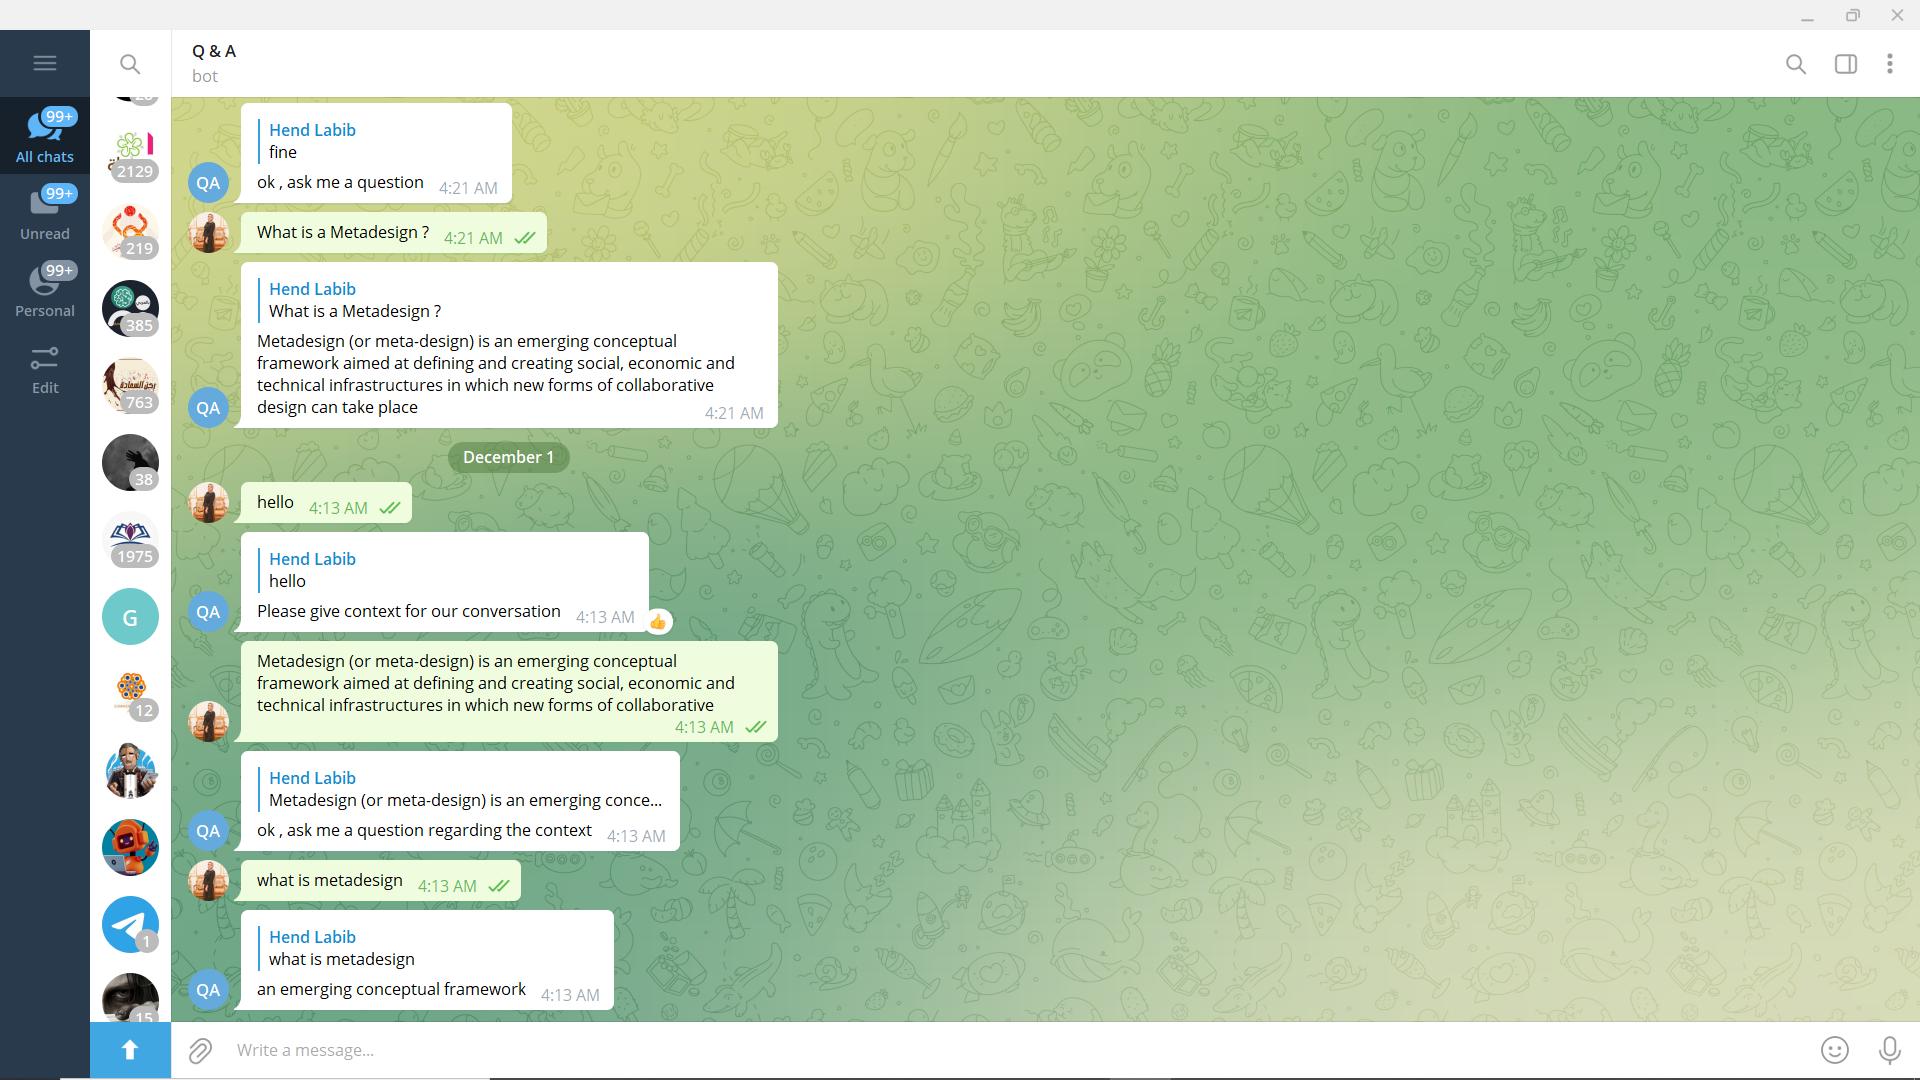